## 1. Executive Summary

This analysis examines sales, profit, and discount patterns in the Superstore dataset using Python (pandas). The objective is to identify overall performance, category-level profitability, and regional disparities that impact business outcomes.

## 2. Imports & Environment Setup


In [1]:
import pandas as pd

## 3. Data Loading Note
The Superstore CSV requires latin1 encoding due to the presence of non-UTF8 characters in text fields.

In [46]:
df = pd.read_csv("../data/superstore.csv", encoding="latin1")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Dataset Dimensions

Understanding the size of the dataset helps assess data volume and complexity before analysis.


In [31]:
df.shape

(9994, 21)

### Column Overview


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

### Data Types Review

Reviewing data types ensures numerical fields are suitable for calculations and date fields can be used for time-based analysis.


In [7]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

### Statistical Summary

This summary provides distribution insights such as central tendency (mean, median) and spread (standard deviation, quartiles).


In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Date Field Conversion

Order Date and Ship Date are converted to datetime format to enable accurate time-based analysis.


In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [10]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [11]:
df[["Order Date", "Ship Date"]].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


### Data Readiness Confirmation
With data structure, types, and formats validated, the dataset is ready for high-level KPI computation and business analysis.


### 4. Overall Business KPIs
Basic sales and profitability metrics computed from the Superstore dataset.

In [27]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean()

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Average Discount: {avg_discount:.2%}")

Total Sales: 2,297,200.86
Total Profit: 286,397.02
Average Discount: 15.62%


### Category-Level Interpretation

- Technology is the strongest performing category, leading in both sales and profit margin.

- Office Supplies maintains healthy profitability despite lower overall sales volume.

- Furniture generates substantial sales but delivers a very low profit margin, indicating margin erosion.

- The results suggest that pricing strategy and discount control are critical for Furniture.

### Category-Level Performance
Aggregated sales, profit, and profit margin by product category.

In [18]:
category_kpi = (
    df
    .groupby("Category")[["Sales", "Profit"]]
    .sum()
    .sort_values("Sales", ascending=False)
)

category_kpi

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [19]:
category_kpi["Profit_Margin"] = (
    category_kpi["Profit"] / category_kpi["Sales"]
)

category_kpi

,Sales,Profit,Profit_Margin
Category,,,
Technology,836154.0330,145454.9481,0.173957
Furniture,741999.7953,18451.2728,0.024867
Office Supplies,719047.0320,122490.8008,0.170352


In [20]:
category_kpi.style.format({
    "Sales": "{:,.2f}",
    "Profit": "{:,.2f}",
    "Profit_Margin": "{:.2%}"
})

,Sales,Profit,Profit_Margin
Category,,,
Technology,"836,154.03","145,454.95",17.40%
Furniture,"741,999.80","18,451.27",2.49%
Office Supplies,"719,047.03","122,490.80",17.04%


In [56]:
import matplotlib.pyplot as plt

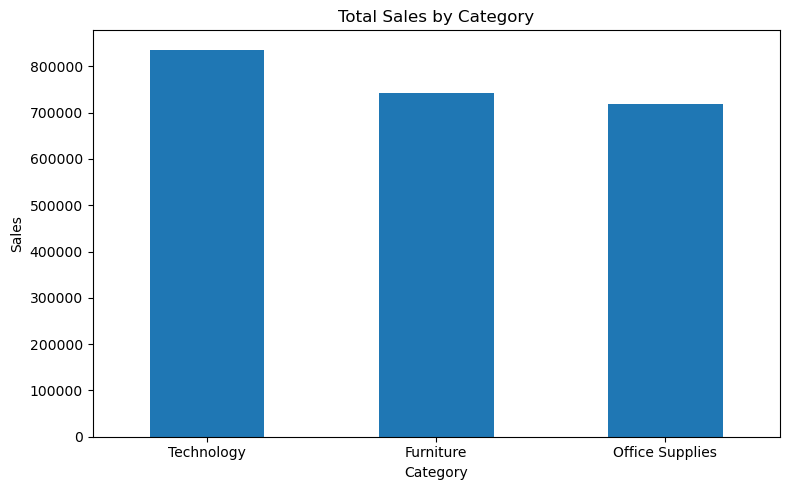

In [55]:
plt.figure(figsize=(8, 5))

category_kpi["Sales"].plot(
    kind="bar",
    title="Total Sales by Category"
)

plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Key Business Takeaways


- Strong revenue performance is driven primarily by Technology and Office Supplies.
- Furniture generates high sales volume but suffers from low profit margins.
- Heavy discounting appears to be eroding profitability across categories.
- Regional performance varies significantly, suggesting the need for localized strategies.


### 5. Region-Level Interpretation

- The West region leads in both total sales and profitability, indicating strong market performance.

- The East region performs well but lags behind the West in profit margin.

- Central and South regions show weaker profitability, suggesting potential pricing or cost challenges.

- Regional performance disparities indicate opportunities for targeted regional strategies.

### Region-Level Performance
Sales, profit, and profit margin aggregated by region.


In [35]:
# Region-level KPIs (Sales, Profit)
region_kpi = (
    df.groupby("Region")[["Sales", "Profit"]]
      .sum()
      .sort_values("Sales", ascending=False)
)

region_kpi
# Profit Margin by Region
region_kpi["Profit_Margin"] = region_kpi["Profit"] / region_kpi["Sales"]

region_kpi
# Format Region-Level KPIs for readability
region_kpi.style.format({
    "Sales": "{:,.2f}",
    "Profit": "{:,.2f}",
    "Profit_Margin": "{:.2%}"
})



,Sales,Profit,Profit_Margin
Region,,,
West,"725,457.82","108,418.45",14.94%
East,"678,781.24","91,522.78",13.48%
Central,"501,239.89","39,706.36",7.92%
South,"391,721.91","46,749.43",11.93%


### Region-Level Performance Summary

- West leads in both sales ($0.73M) and profit ($108.4K), achieving the highest profit margin (14.94%), indicating strong overall performance and effective cost control.

- East is a strong second with sales of $0.68M and profit of $91.5K, maintaining a healthy profit margin (13.48%) and consistent operational efficiency.

- Central is the weakest-performing region: despite generating $0.50M in sales, profit is limited to $39.7K and the margin is the lowest (7.92%), indicating significant profitability pressure.

### Profit by Region

Comparison of total profit contribution across regions.


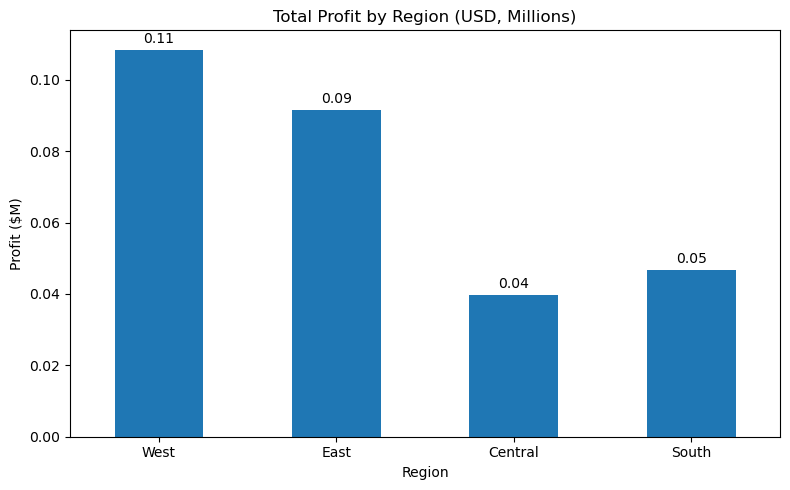

In [38]:
profit_m = region_kpi["Profit"] / 1_000_000

plt.figure(figsize=(8, 5))
profit_m.plot(
    kind="bar",
    title="Total Profit by Region (USD, Millions)"
)
for index, value in enumerate(profit_m):
    plt.text(index, value + 0.002, f"{value:.2f}", ha="center")
plt.xlabel("Region")
plt.ylabel("Profit ($M)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





### Profit-Level Takeaways (Region)

- The West region is the most profitable, generating approximately **$0.11M** in profit, reflecting strong operational efficiency.
- The East region follows with around **$0.09M** in profit, showing solid performance but still trailing the West.
- The South region records moderate profitability at roughly **$0.05M**, despite lower overall sales.
- The Central region delivers the weakest profit at about **$0.04M**, indicating margin pressure from pricing, discounting, or cost structure.



## 6. Discount Impact – Key Insights



In [41]:
df["profit_margin"] = df["Profit"] / df["Sales"]


In [42]:
df["profit_margin_pct"] = df["profit_margin"] * 100


In [43]:
df["loss_flag"] = df["Profit"] < 0


In [47]:
df["discount_band"] = pd.cut(df["Discount"], bins=[-0.001, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], labels=["0%", "0–10%", "10–20%", "20–30%", "30–40%", "40–50%", "50%+"])


In [51]:
discount_category_agg = (
    df
    .groupby(["discount_band", "Category"], observed=True)
    .agg(
        total_sales=("Sales", "sum"),
        total_profit=("Profit", "sum"),
        order_count=("Order ID", "count")
    )
    .reset_index()
)


In [53]:
import seaborn as sns


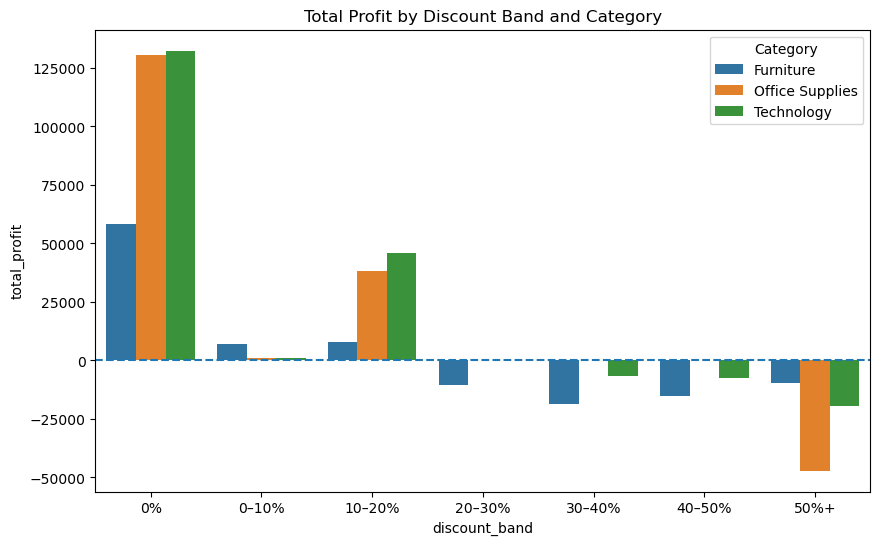

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=discount_category_agg,
    x="discount_band",
    y="total_profit",
    hue="Category"
)
plt.axhline(0, linestyle="--")
plt.title("Total Profit by Discount Band and Category")
plt.show()


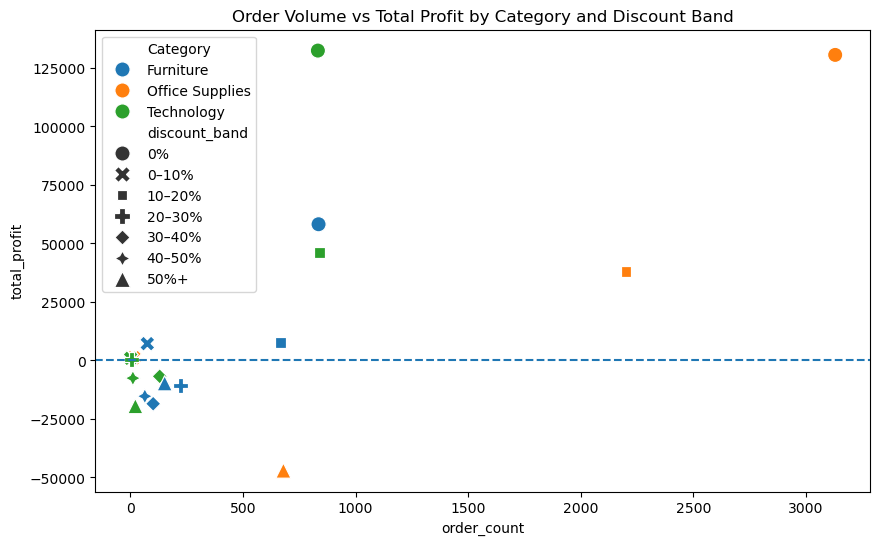

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=discount_category_agg,
    x="order_count",
    y="total_profit",
    hue="Category",
    style="discount_band",
    s=120
)
plt.axhline(0, linestyle="--")
plt.title("Order Volume vs Total Profit by Category and Discount Band")
plt.show()


In [58]:
region_category_agg = (
    df
    .groupby(["Region", "Category"], observed=True)
    .agg(
        total_profit=("Profit", "sum")
    )
    .reset_index()
)


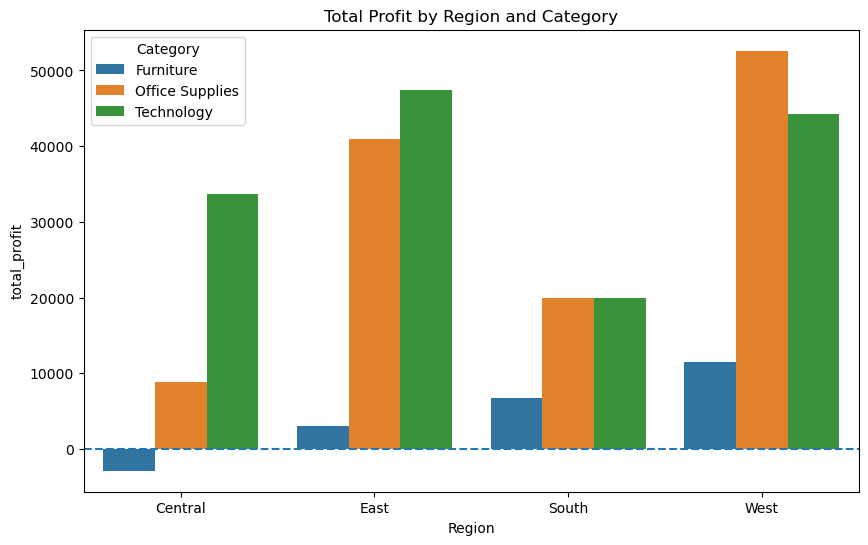

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=region_category_agg,
    x="Region",
    y="total_profit",
    hue="Category"
)
plt.axhline(0, linestyle="--")
plt.title("Total Profit by Region and Category")
plt.show()


### Discount Impact – Key Takeaways


- Discount is not the root cause of losses — it amplifies existing weaknesses.
Losses persist even at low discount bands in certain categories, indicating that underlying cost and margin structures drive unprofitability before discounts are applied.

- Category economics dominate profitability outcomes.
Furniture shows early and consistent losses (especially in Central), while Technology remains profitable across most discount levels and regions, proving stronger unit economics and higher discount resilience.

- High order volume does not guarantee profit.
Office Supplies records very high order counts but experiences sharp losses at extreme discount levels, highlighting price sensitivity and thin margins rather than demand issues.

- Losses are regionally concentrated, not uniform.
The Central region is structurally risk-prone (Furniture losses), while West and East drive overall profitability. Regional focus should prioritize mitigating category-specific risks rather than blanket discount controls.

#### Overall, profitability improvement requires category- and region-specific strategies, with disciplined discounting applied only where unit economics can sustain it.